In [7]:
import torch
from torch.utils.data import Dataset
import string
translator = str.maketrans('', '', string.punctuation)
import random
import glob
from PIL import Image
import numpy as np
from torch.nn.utils.rnn import pad_sequence
import pickle
import matplotlib.pyplot as plt
import clip
from PIL import Image

FRAME_DIR = '/shared/jlin/gnlp_data/'
OUTPUT_DIR = '/shared/jlin/gnlp_data/processed-frames'

In [8]:
obj = 0
env = 0
frames = torch.from_numpy(torch.load(open('{}/obj{}-env{}-center-50x50.pt'.format(OUTPUT_DIR, obj, env), 'rb')))

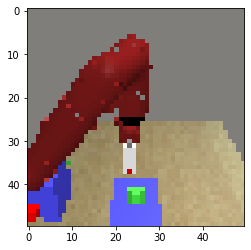

In [9]:
plt.imshow(frames[10].numpy().transpose(1,2,0))

In [10]:
descriptions = pickle.load(open('{}/{}_descr.pkl'.format(FRAME_DIR, 'train'), 'rb'))

In [11]:
descriptions[0]

['push the button',
 'push down the green rod',
 'push the green cylinder downward',
 'press the button',
 'press the vertical button',
 'press the green button',
 'push the button',
 'setting the drawer',
 'grab and press down green cylinder piece',
 'push the button',
 'press the button',
 'push the button',
 'pushing green object',
 'pick up green cylinder',
 'press the button',
 'push the button',
 'push the button',
 'push the button',
 'press the button',
 'press the button',
 'press the button',
 'push the green circular button',
 'push the button under you',
 'push the round peg further into the square opening',
 'push the round peg down',
 'place the grabbers next to the green circle on the blue block',
 'push the peg down on the horizontal block',
 'press the green button',
 'press the button',
 'push down the cylinder',
 'push the green cylindrical block in the hole',
 'press down on the button',
 'push the button',
 'push the small cylinder down into the blue shape',
 'turn

               push the button [0.1304  0.11865 0.10974 0.1283  0.1244  0.1866  0.2019 ]
       push down the green rod [0.1306 0.1458 0.1348 0.1306 0.1327 0.1576 0.1677]
push the green cylinder downward [0.1268  0.1155  0.10846 0.1288  0.1155  0.2261  0.1788 ]
              press the button [0.1185  0.11487 0.1014  0.1242  0.1113  0.2249  0.2048 ]
     press the vertical button [0.1261  0.11664 0.11304 0.1343  0.11847 0.2079  0.1835 ]
        press the green button [0.1251  0.11566 0.1087  0.129   0.1212  0.2095  0.1908 ]
               push the button [0.1304  0.11865 0.10974 0.1283  0.1244  0.1866  0.2019 ]
            setting the drawer [0.11597 0.1334  0.11066 0.1254  0.11066 0.2035  0.2003 ]
grab and press down green cylinder piece [0.11646 0.11285 0.09503 0.1299  0.1012  0.2465  0.1981 ]
               push the button [0.1304  0.11865 0.10974 0.1283  0.1244  0.1866  0.2019 ]
              press the button [0.1185  0.11487 0.1014  0.1242  0.1113  0.2249  0.2048 ]
               p

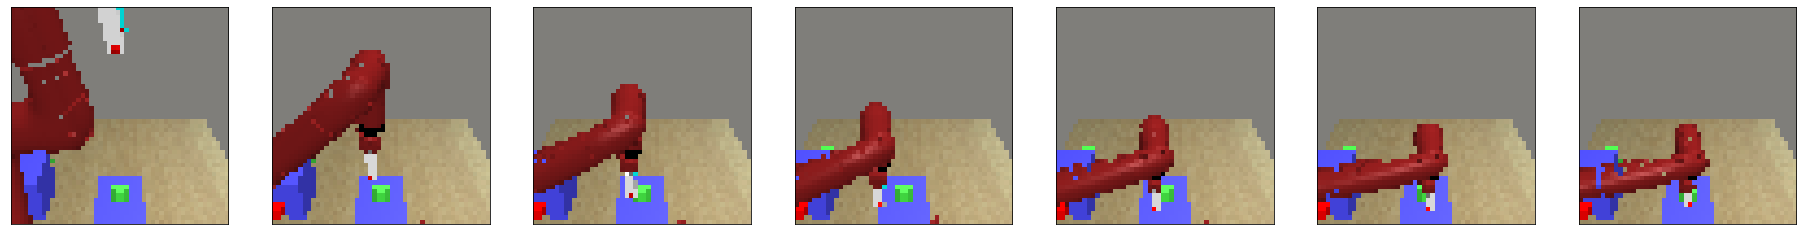

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
images = []
frame_skip = 20
fig = plt.figure(figsize=(32, 32))
columns = len(frames)//frame_skip + 1
rows = 1

for i in range(0, len(frames), frame_skip):
    img = frames[i].numpy().transpose(1,2,0)
    fig.add_subplot(rows, columns, i//frame_skip + 1)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.imshow(img)
    image = preprocess(Image.fromarray(np.uint8(img))).unsqueeze(0).to(device)
    images.append(image)

images = torch.cat(images)
text = clip.tokenize(descriptions[0]).to(device)

with torch.no_grad():
    logits_per_image, logits_per_text = model(images, text)
    probs = logits_per_text.softmax(dim=-1).cpu().numpy()

for i in range(len(probs)):
    print(descriptions[0][i].rjust(30), probs[i])

print("Average: ".rjust(30), probs.mean(0))
plt.show()